In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler

In [2]:
all_hot_songs = pd.read_csv('./all_top_songs.csv')
all_hot_songs.head()

,album,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Rainbow Connection,The Muppets,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936
1,Somewhere Over The Rainbow_What A Wonderful World,Israel Kamakawiwo'ole,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005
2,What a Wonderful World,Joey Ramone,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044
3,One Day / Reckoning Song (Wankelmut Remix) [Ra...,Asaf Avidan & the Mojos,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012
4,What A Wonderful World - Single Version,Louis Armstrong,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894


In [3]:
all_hot_songs['album'] = all_hot_songs['album'].str.lower()
all_hot_songs = all_hot_songs.rename(columns={'album':'song_title',})

In [4]:
df_names_only = all_hot_songs.drop(['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'], axis=1)
df_names_only.head()

,song_title,artist,uri
0,rainbow connection,The Muppets,spotify:track:1SJ4ycWow4yz6z4oFz8NAG
1,somewhere over the rainbow_what a wonderful world,Israel Kamakawiwo'ole,spotify:track:25U7raB3ZSszayTYClh4hF
2,what a wonderful world,Joey Ramone,spotify:track:04cdEVbQPb8BJb7593e5fO
3,one day / reckoning song (wankelmut remix) [ra...,Asaf Avidan & the Mojos,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu
4,what a wonderful world - single version,Louis Armstrong,spotify:track:2pp3RfqX5cb1BAnmNi4Nej


In [5]:
clust = all_hot_songs.drop(['song_title', 'artist','uri'], axis=1)
clust.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936
1,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005
2,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044
3,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012
4,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894


In [6]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler().fit(clust)
X_prep = scaler.transform(clust)

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [8]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     42
1    488
2    285
dtype: int64

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

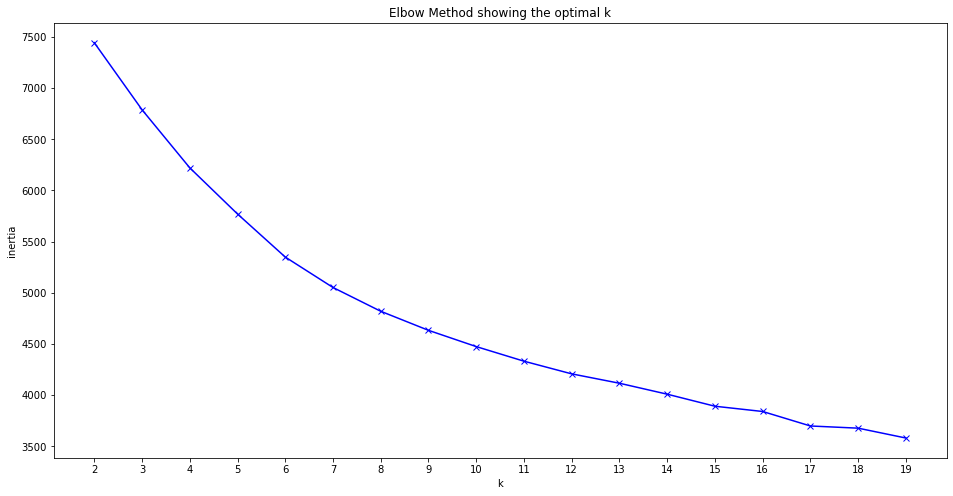

In [9]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

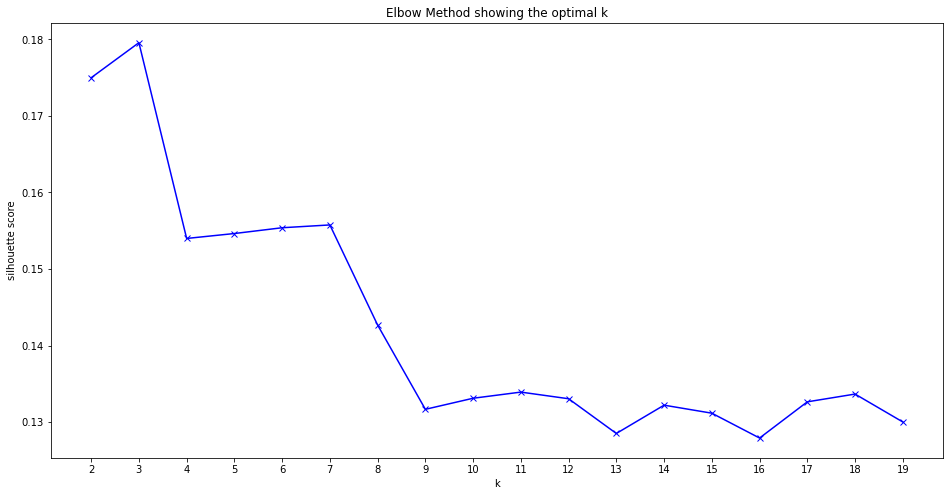

In [10]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

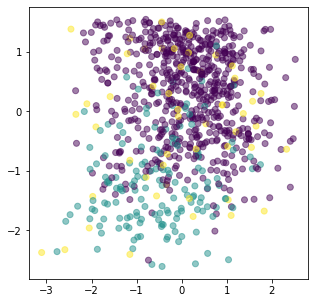

In [11]:
from sklearn import cluster
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(X_prep)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

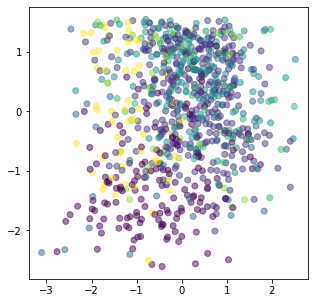

In [12]:
from sklearn import cluster
agglomerative = cluster.AgglomerativeClustering(n_clusters=7,linkage='ward')
pred = agglomerative.fit_predict(X_prep)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

In [13]:
cluster_df = pd.concat([clust,pd.Series(clusters)],axis=1)
cluster_df = cluster_df.rename(columns={0:'cluster'})
# cluster_df

In [14]:
after_clustering = pd.concat([df_names_only, cluster_df],axis=1)
after_clustering 
after_clustering.to_csv('all_top_songs_after_clustering.csv', index=False)

In [15]:
kmeans.inertia_ 

3581.3194542321366

In [16]:
# importing top 100 songsq
top_100_songs = pd.read_csv('./top_100_songs.csv')
top_100_songs['title'] = top_100_songs['title'].str.lower()
top_100_songs['artist'] = top_100_songs['artist'].str.lower()
# top_100_songs

In [17]:

from random import randint

def songs (data=top_100_songs):
    song =  str(input("Please search songs or artist you are intrested in: ").lower())
    for i in range(len(top_100_songs)):
        if top_100_songs['title'][i] == song:
            rand_number = randint(0,len(top_100_songs))
            return(print("We would recommend you to listen: \"", top_100_songs['title'][rand_number], "\" by", top_100_songs['artist'][rand_number]))
        elif top_100_songs['artist'][i] == song:
            rand_number = randint(0,len(top_100_songs))
            return(print("We would recommend you to listen: \"", top_100_songs['title'][rand_number], "\" by", top_100_songs['artist'][rand_number]))
    return ("Not in the list")
songs()

Please search songs or artist you are intrested in: adele
We would recommend you to listen: " dekhi jau (feat. gurlez akhtar) " by gur sidhu


In [18]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [19]:

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='88d5f9f8717f4ddcae5b8eb5b7e66581',
                                                           client_secret='f9cee08b9abd4b5b87cba994229eeb73'))

In [20]:
def audio_features(song, artist):
    search = artist + ' - '+ song
    features = sp.audio_features(sp.search(q=search, limit=1)["tracks"]["items"][0]['uri'])[0]
    return features

def songs (data=top_100_songs):
    
    song =  str(input("search the songs you are intrested in: ").lower())
    artist =  str(input("search the artist you are liked the most: ").lower())
    search = sp.search(q=song, type='track')
    check = search["tracks"]["total"] 

    while check == 0:
        print("This choosen Song does not exists in our list, please try another song")
        song =  str(input("The searched songs you are intrested is : ").lower())
        artist =  str(input("The searched artist you are intrested in: ").lower())
        search = sp.search(q=song, type='track')
        check = search["tracks"]["total"]

    if ((top_100_songs[(top_100_songs['title'] == song) & (top_100_songs['artist'] == artist)].count()[0] > 0)):
        rand_number = randint(0,len(top_100_songs))
        print("I would recommend you to listen the song: \"", top_100_songs['song_title'][rand_number], "\" by", top_100_songs['artist'][rand_number])
    else:       
        feature = audio_features(song,artist)
        new_song = pd.DataFrame([feature])
        new_song = new_song.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'],axis=1)
        new_scaler = scaler.transform(new_song)
        new_clusters = kmeans.predict(new_scaler)
        cluster_final = after_clustering[after_clustering['cluster'] == list(new_clusters)[0]]
        rand_number1 = randint(0,len(after_clustering))
        print("We will recommend this song to you: \"",after_clustering['song_title'][rand_number1], "\" by", after_clustering['artist'][rand_number1])
    return
songs()  

search the songs you are intrested in: adlkjjsl
search the artist you are liked the most: sjmjsjund
This choosen Song does not exists in our list, please try another song
The searched songs you are intrested is : happy
The searched artist you are intrested in: haricharan
We will recommend this song to you: " i bet my life " by Imagine Dragons
